In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('shopping_trends.csv')
df_updated = pd.read_csv('shopping_trends_updated.csv')

##### Take a look at this two Data

In [4]:
print(df.columns)
print(df_updated.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')
Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


#### shopping_trends have one additional column: **Payment Method**

### **Each column information:**

#### ***Customer ID*** - Unique identifier for each customer
#### ***Age*** - Age of the customer
#### ***Gender*** - Gender of the customer (Male/Female)
#### ***Item Purchased*** - The item purchased by the customer
#### ***Category*** - Category of the item purchased
#### ***Purchase Amount (USD***) - The amount of the purchase in USD
#### ***Location*** - Location where the purchase was made
#### ***Size*** - Size of the purchased item
#### ***Color*** - Color of the purchased item
#### ***Season*** - Season during which the purchase was made
#### ***Review Rating*** - Rating given by the customer for the purchased item
#### ***Subscription Status*** - Indicates if the customer has a subscription (Yes/No)
#### ***Shipping Type*** - Type of shipping chosen by the customer
#### ***Discount Applied*** - Indicates if a discount was applied to the purchase (Yes/No)
#### ***Promo Code Used*** - Indicates if a promo code was used for the purchase (Yes/No)
#### ***Previous Purchases*** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
#### ***Payment Method*** - Customer's most preferred payment method
#### ***Frequency of Purchases*** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [5]:
# I remove the ID first
df = df.drop(columns = 'Customer ID')
df2 = df_updated.drop(columns = 'Customer ID')

In [6]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## *Check Missing values and duplicated*

In [12]:
print('Missing\ndf:', sum(df.isna().sum()), '\ndf_updated:', sum(df_updated.isna().sum()))
print('\nDuplicated\ndf:',df.duplicated().sum(), '\ndf_updated:',df_updated.duplicated().sum())

Missing
df: 0 
df_updated: 0

Duplicated
df: 0 
df_updated: 0


### Both Data are Clean and no Duplicated

## **Exploratory Data Analysis**

### Let see each range of age prefer **category**, and the **average money** they spent

In [432]:
df.Age.describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

### The youngest is 18 and the eldest is 70 years old, I will create ranges **18-30, 30-40, 40-50, 50-60 , 60-70**

In [13]:
def age_range(values):
    if 18 <= values < 30:
        return '18-30'
    if 30 <= values < 40:
        return '30-40'
    if 40 <= values < 50:
        return '40-50'
    if 50 <= values < 60:
        return '50-60'
    if 60 <= values < 70:
        return '60-70'
        
df['year_range'] = df['Age'].apply(lambda x: age_range(x))

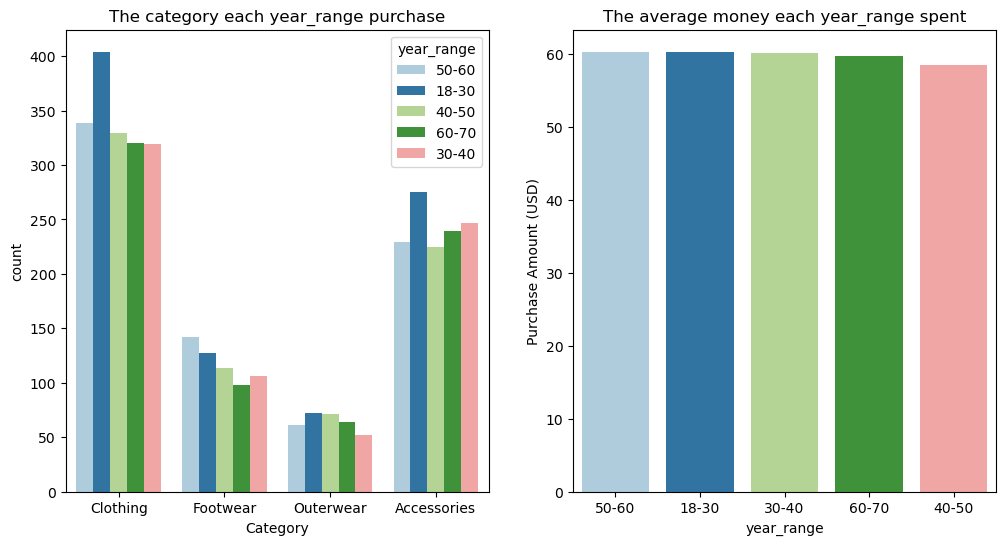

In [54]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sorts = ['18-30', '30-40', '40-50', '50-60', '60-70']
sns.countplot(df, x = 'Category', hue = 'year_range', palette = "Paired")
plt.title('The category each year_range purchase')

plt.subplot(122)
dd = df.groupby('year_range')['Purchase Amount (USD)'].mean().reset_index().sort_values(by = 'Purchase Amount (USD)', ascending = False)
sns.barplot(dd, x = 'year_range', y = 'Purchase Amount (USD)', palette = "Paired")
plt.title('The average money each year_range spent')
plt.show()

### 18-30 buy **clothing** and **Acessories** more than other year_range a lot. 50-60 buy more footwear the most
### 50-60 spent most money in average and 40-50 spent less

##  which **Location** spent the **most money** in average

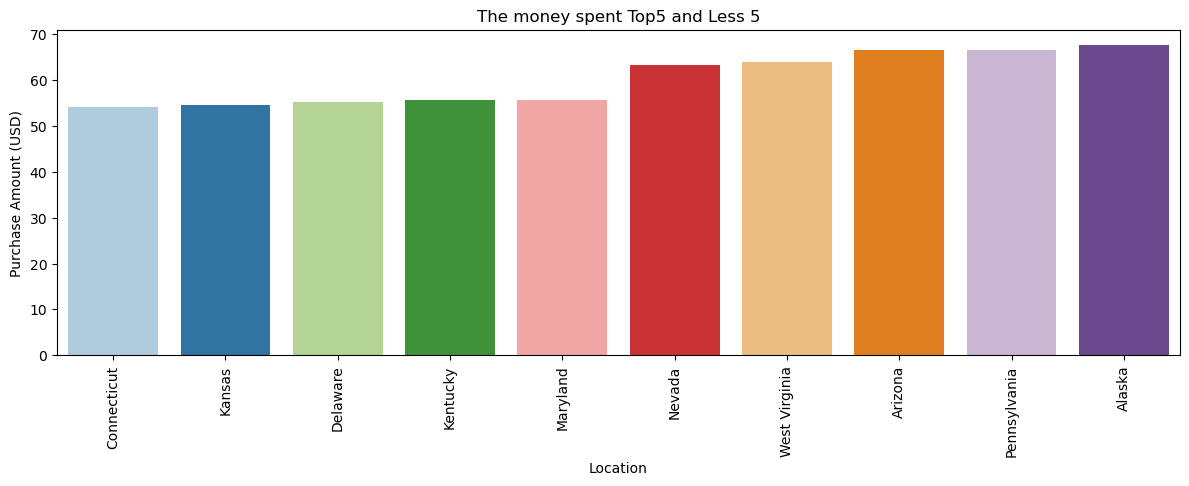

In [56]:
Location_purchase = df.groupby(['Location'])['Purchase Amount (USD)'].mean().reset_index().sort_values(by = ['Purchase Amount (USD)'])
# I only take TOP 5 and LESS 5
new_df = pd.concat([Location_purchase[:5], Location_purchase[-5:]])
plt.figure(figsize = (12,4))
sns.barplot(new_df, x = 'Location', y = 'Purchase Amount (USD)', palette="Paired")
plt.tight_layout()
plt.xticks(rotation = 90)
plt.title('The money spent Top5 and Less 5')
plt.show()

### **Alaska** spent most money and **Connecticut** spent the Less

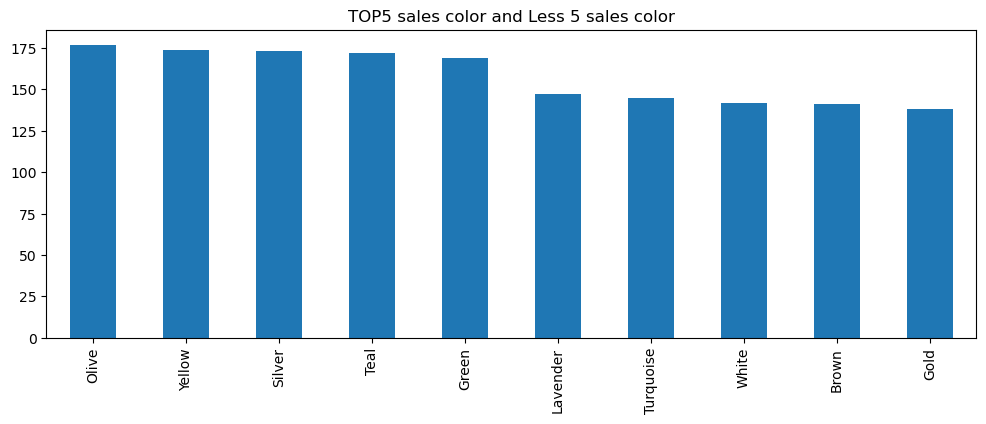

In [64]:
plt.figure(figsize = (12,4))
pd.concat([df.Color.value_counts(ascending = False)[:5], df.Color.value_counts(ascending = False)[-5:]]).plot(kind = 'bar')
plt.title('TOP5 sales color and Less 5 sales color')
plt.show()

### **Olive** saled most, **Gold** saled the less

### Which **Item** people spent most money on it?

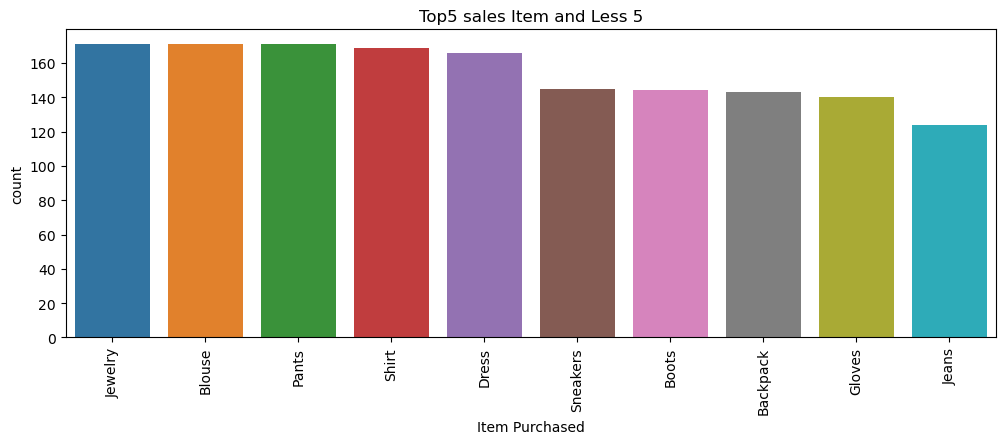

In [69]:
new_df = df.groupby(by = ['Item Purchased'])['Color'].count().reset_index().sort_values(by = ['Color'], ascending = False)
new_df = pd.concat([new_df[:5], new_df[-5:]])

plt.figure(figsize = (12,4))
sns.barplot(new_df, x = 'Item Purchased', y = 'Color')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Top5 sales Item and Less 5')
plt.show()

### people bought **Jewelry** most, bought **Jeans** Less a lot

### Let see which location have **Less Subscription**, or used **Less Promo Code**

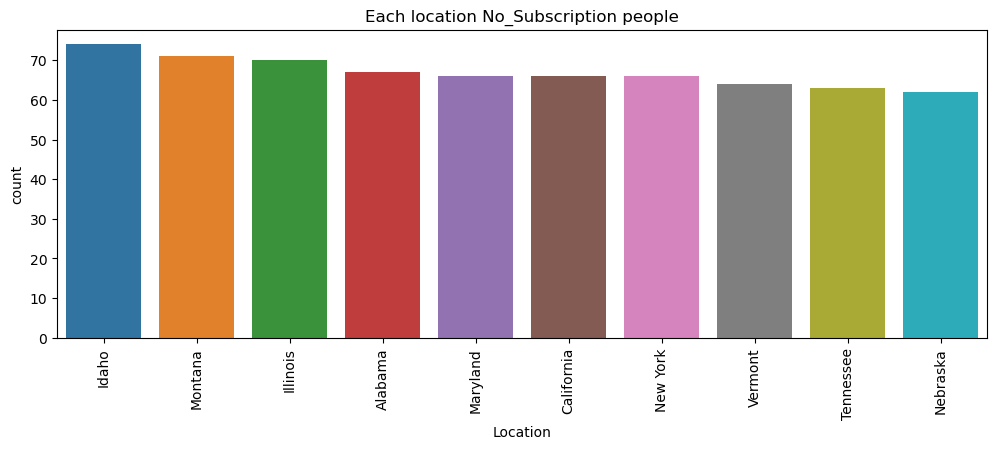

In [74]:
new_df = df.groupby(['Location', 'Subscription Status'])['Age'].count().reset_index().sort_values(by = ['Age'], ascending = False)
No_subscription = new_df[new_df['Subscription Status'].isin(['No'])]

plt.figure(figsize=(12,4))
sns.barplot(No_subscription[:10], x = 'Location', y = 'Age')
plt.title('Each location No_Subscription people')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

### **Idaho** have the Less Subscription, it should have a great potential

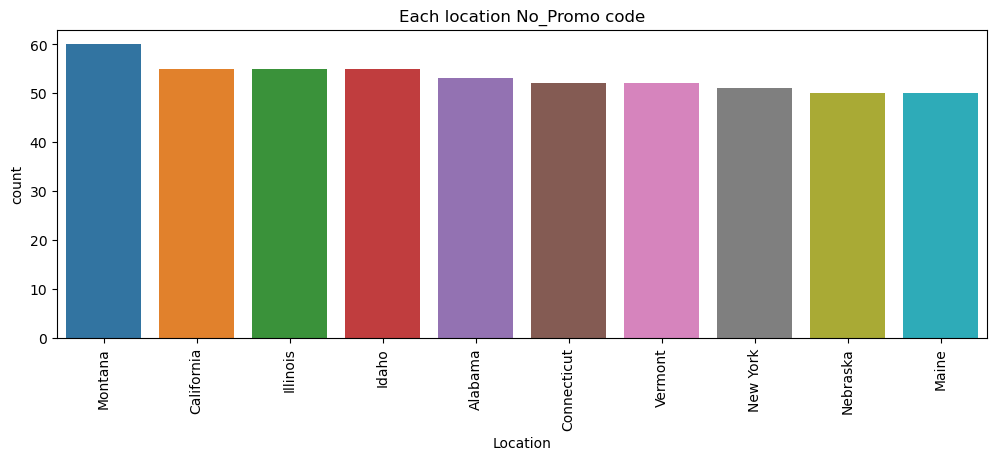

In [75]:
new_df = df.groupby(['Location', 'Promo Code Used'])['Age'].count().reset_index().sort_values(by = ['Age'], ascending = False)
No_subscription = new_df[new_df['Promo Code Used'].isin(['No'])]

plt.figure(figsize=(12,4))
sns.barplot(No_subscription[:10], x = 'Location', y = 'Age', palette = 'tab10')
plt.title('Each location No_Promo code')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

### **Montana** used Less Promo Code, maybe the promo Code did not fit the local people shopping habit

### Whcih **Item** have the highest Rating

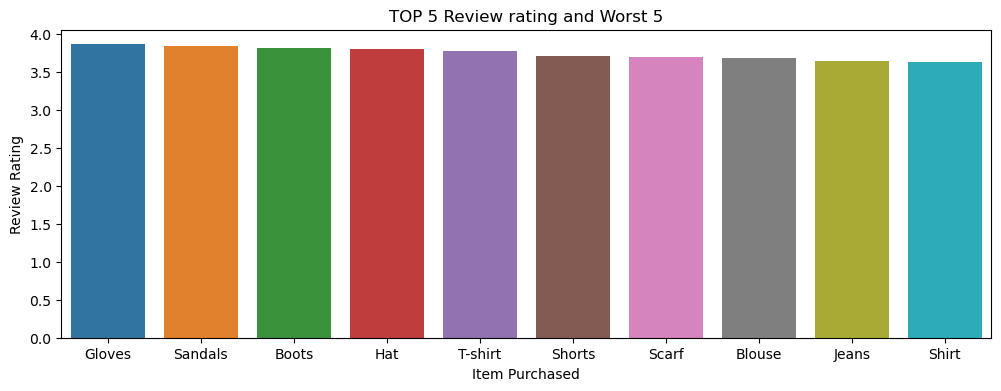

In [76]:
new_df = df.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending = False).reset_index()
new_df = pd.concat([new_df[:5], new_df[-5:]])

plt.figure(figsize=(12,4))
sns.barplot(new_df, x = 'Item Purchased', y = 'Review Rating', palette = 'tab10')
plt.title('TOP 5 Review rating and Worst 5')
plt.show()

### **Gloves** have the highest Rating, and **Shirt** have worst

### What is most of the customer use for paying

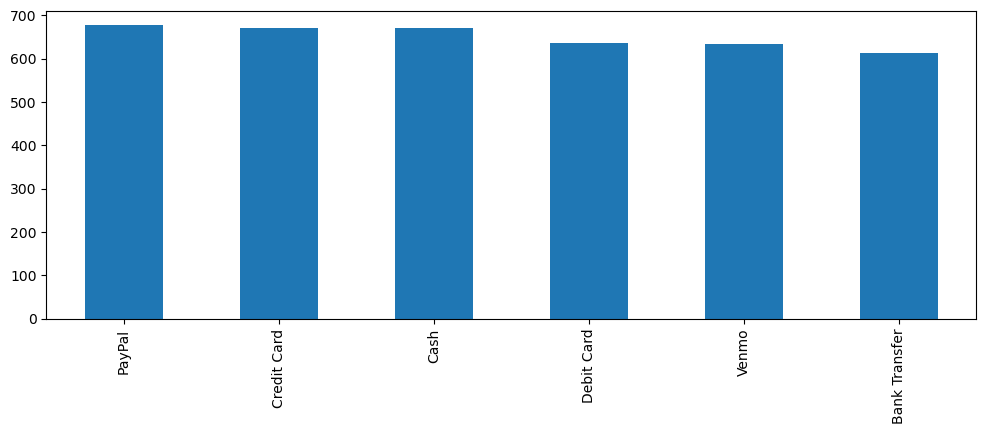

In [77]:
plt.figure(figsize=(12,4))
df['Preferred Payment Method'].value_counts().plot(kind = 'bar')
plt.show()

### **PayPal** is most customer used for paying, **Bank Transfer** is Less